#### Importo las librerías requeridas para el EDA.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Análisis exploratorio de datos referente al "homicidios_HECHOS.csv".

Cargo el archivo "homicidios_HECHOS.xlsx" 

In [150]:
df_homicidios_hechos = pd.read_csv("homicidios_HECHOS.csv")

Observo como vienen los datos.

In [151]:
pd.set_option("display.max_columns", None)
df_homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,12/13/2021,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,12/20/2021,2021,12,20,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,12/30/2021,2021,12,30,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,12/15/2021,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


<h3>Leyendo columna por columna, podemos ir observando las más importantes y que no deben faltar, estás son: </h3>

"ID": es fundamental tener el identificador único del siniestro para poder asegurar que el accidente en verdad ocurrió. Dicho "ID", también cuenta con el año en el que acaeció  <br><br>

"N_VICTIMAS": Es indispensable saber la cantidad de victimas que hubo en un siniestro, claro que en caso que nos faltase esta información, podríamos imputarla con la media, mediana o moda, pero, si fueran muchos casos donde no tengamos información de la cantidad de victimas, no nos valdría de mucho ninguna forma de rellenar la información.<br><br>

"FECHA": Esta columna contiene el año, el mes y el día, por lo que no es posible realizar un estudio estadístico sin estos 3 datos.<br> Si tuviera que colocar un order de importancia, este quizá sería el mes, el día y el año. Esto puede ser un poco extraño a primera vista, pero, lo que se busca es observar a lo largo del tiempo cuando fueron los accidentes y como reducirlos, teniendo las fechas de varios años podemos comparar los meses y ver que mes tiende a ser más elevado e intentar sacar conclusiones, luego, por ejemplo, veríamos la cantidad de fiestas que se realizan en dicho mes, o quizá también pueda deberse al clima, todo esto son factores que pueden ser tomados en un mes. Mientras que el día es un valor que es importante en su conjunto, pero del cual no se podría sacar tanta información al estar tan aíslado. Y, ni que decir del año, ciertamente es muy importante y, nadie lo pone en duda, es solo que observar unos datos totales puede estar ocultando información valiosa que se puede encontrar en fechas más concretas. <br><br>

"HORA": Creo que el horario es algo muy importante. ¿Puede que un accidente ocurra más en la noche cuando las personas van más rápido y algunas pueden estar afectados por alcohol o estupefacientes?, ¿o quizá en el día cuando muchos están estresados por ir al trabajo y el trafico esta más abarrotado? <br><br>

"TIPO_DE_CALLE": Sabiendo el tipo de calle donde más se frecuentan los accidentes, es más fácil decidir que medidas tomar al respecto. Quizá en las avenidas hacen falta semáforos o puede que en las autopistas se requiera más contról en la velocidad de los vehiculos. <br><br>

"Calle": ¿La calle será que no está bien pavimentada o para empezar ni pavimentada está?, ¿puede deberse al ripio (calle de tierra con muchas piedritas) que no fue beneficioso porque en el barrio hay muchas bicicletas? <br><br>

"Cruce": Con este dato podemos saber si los accidentes ocurren más veces en las encrucijadas y entonces tomar medidas, como colocar semáforos o disminuir el límite de velocidad. <br><br>

"COMUNA": La mar de la ocaciones es necesario saber donde ocurren más accidentes para centrar el foco en dicho lugar. <br><br>

"pos x", "pos y": Creo que ambos son esenciales para poder hacer más sencillo la forma de ver desde un mapa como en Power BI o cualquier app que permita ver geolocalizaciones. <br><br>

"PARTICIPANTES": Hay que observar la relación que tienen, puede ser que las motos sean más propensos a accidentes con peatones porque no respetan el tráfico, o quizá los camiones choquen a autos por sus largar jornadas laborales. <br><br>


"VICTIMA", "ACUSADO": Diría que son los más fundamentales, con está información, sabemos que debemos hacer y hacia que público en particular debemos direccionar nuestra atención.


<h4>Ahora sabiendo las columnas que son más importantes, observaré sus tipos de datos y su cantidad de nulos.

In [152]:
# Recorro cada columna del DataFrame
for column in df_homicidios_hechos.columns:
    
    # Verifico que la columna sea de tipo objeto (strings)
    if df_homicidios_hechos[column].dtype == 'object':
        # Reemplazo los valores que son solo espacios o tabuladores con NaN
        df_homicidios_hechos[column] = df_homicidios_hechos[column].replace(r'^\s*$', np.nan, regex=True)
        

In [153]:
df_homicidios_hechos.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Vemos datos faltantes en una columna importante: "Cruce", pero si leemos el "diccionario de datos Siniestros viales", podemos ver que dice que solo es colocado en caso de que sea una encrucijada, por lo que podemos asumir que si no hay datos en ello es porque no fue en una encrucijada. <br>También hay un valor faltante en "Calle", observaré esa fila.

Colocaré en los valores faltante de "Cruce" "NO CRUCE" para hacer referencia a que el accidente no ocurrió en un cruce. Y, en los valores faltantes de "Altura" me aseguraré de colocar un np.nan para referir bien a un valo vacío tipo numérico y, en "Dirección Normalizada" colocaré "N/D", haciendo referencia a que no existe ningún dato.

In [154]:
# Coloco "NO CRUCE" en los valores faltantes.
df_homicidios_hechos.loc[df_homicidios_hechos["Cruce"].isna() == True, "Cruce"] = "NO CRUCE"

In [155]:
# Coloco "N/D" en "Dirección Normalizada".
df_homicidios_hechos.loc[df_homicidios_hechos["Dirección Normalizada"].isna() == True, "Dirección Normalizada"] = "N/D"
# Coloco np.nan en "Altura".
df_homicidios_hechos.loc[df_homicidios_hechos["Altura"].isna() == True, "Altura"] = np.nan

In [156]:
df_homicidios_hechos[df_homicidios_hechos["Calle"].isna() == True]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,11/18/2016,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NO CRUCE,N/D,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Procedo a colocar "N/D" en "Calle" ya que no se tiene ninguna información del lugar.

In [157]:
df_homicidios_hechos.loc[df_homicidios_hechos["Calle"].isna() == True, "Calle"] = "N/D"

Observo los datos ahora que fueron modificados.

In [158]:
df_homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NO CRUCE,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,12/13/2021,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,12/20/2021,2021,12,20,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,12/30/2021,2021,12,30,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,12/15/2021,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NO CRUCE,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


Vuelvo a observar los nulos. El único que no debería cambiar sería la altura

In [159]:
df_homicidios_hechos.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      0
Altura                   567
Cruce                      0
Dirección Normalizada      0
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Todo correcto. Ahora pasaré a observar que todos tengan su tipo de dato correcto.

In [160]:
for column in df_homicidios_hechos.columns:
    print(column,"-", df_homicidios_hechos.loc[0, column], "-", df_homicidios_hechos[column].dtype)

ID - 2016-0001 - object
N_VICTIMAS - 1 - int64
FECHA - 1/1/2016 - object
AAAA - 2016 - int64
MM - 1 - int64
DD - 1 - int64
HORA - 4:00:00 - object
HH - 4 - object
LUGAR_DEL_HECHO - AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ - object
TIPO_DE_CALLE - AVENIDA - object
Calle - PIEDRA BUENA AV. - object
Altura - nan - float64
Cruce - FERNANDEZ DE LA CRUZ, F., GRAL. AV. - object
Dirección Normalizada - PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV. - object
COMUNA - 8 - int64
XY (CABA) - Point (98896.78238426 93532.43437792) - object
pos x - -58.47533969 - object
pos y - -34.68757022 - object
PARTICIPANTES - MOTO-AUTO - object
VICTIMA - MOTO - object
ACUSADO - AUTO - object


Para poder visualizar correctamente las fechas, es necesario que sea de tipo "to_datetime" y tenga el formato "AAAA-mm-dd".<br><br>
La columna "HH" es tipo "object" y debe ser tipo entero y, "pos x" y "pos y" que también son tipo "object" deben ser tipo float.

Procedo a cambiar cada uno a su tipo correcto y agregar una nueva columna con el formato de fecha "AAAA-mm-dd".

In [161]:
# Columna "HH"
# df_homicidios_hechos["HH"] = df_homicidios_hechos["HH"].astype("Int64")

Hay un problema en la conversión de tipo, esto se debe a que existen strings que dicen SD en algunas filas donde no se sabe su horario. Esto resultará problematico cuando se intente hacer gráficos con los horarios, por lo que la mejor opción es cambiar esos "SD" por NaN de numpy que no interfieren con los cálculos numéricos.

In [162]:
# Transformo a todos los SD en NaN
df_homicidios_hechos["HH"] = df_homicidios_hechos["HH"].replace("SD", np.nan, regex=True)
# Cambio el tipo de dato de la columna "HH"
df_homicidios_hechos["HH"] = df_homicidios_hechos["HH"].astype("Int64")
df_homicidios_hechos["HH"].dtype

Int64Dtype()

In [163]:
# Ahora cambio los tipos de dato de "pos x".
# df_homicidios_hechos["pos x"] = df_homicidios_hechos["pos x"].astype("float64")

Error similar que en la columna "HH", pero en este caso, en vez de haber "SD" hay ".". Me dispongo a cambiar todos los valores que no son tipo numérico, por NaN.

In [164]:
df_homicidios_hechos["pos x"] = df_homicidios_hechos["pos x"].replace(".", np.nan)
df_homicidios_hechos["pos y"] = df_homicidios_hechos["pos y"].replace(".", np.nan)
#Cambio sus tipos de datos.
df_homicidios_hechos["pos x"] = df_homicidios_hechos["pos x"].astype("float64")
df_homicidios_hechos["pos y"] = df_homicidios_hechos["pos y"].astype("float64")

print(df_homicidios_hechos["pos x"].dtype, df_homicidios_hechos["pos y"].dtype)

float64 float64


Por último, me dispongo a crear la nueva columna "fecha_amd", donde tendrá el formato AAAA-mm-dd.

In [165]:
df_homicidios_hechos["fecha_amd"] = pd.to_datetime(df_homicidios_hechos["FECHA"], format="%m/%d/%Y")
df_homicidios_hechos["fecha_amd"]

0     2016-01-01
1     2016-01-02
2     2016-01-03
3     2016-01-10
4     2016-01-21
         ...    
691   2021-12-13
692   2021-12-20
693   2021-12-30
694   2021-12-15
695   2021-11-18
Name: fecha_amd, Length: 696, dtype: datetime64[ns]

<h3>Habiendo terminado de correjir los tipos de datos pasaré a ver que no hayan filas duplicadas.</h3>

In [166]:
df_homicidios_hechos.duplicated().sum()

np.int64(0)

In [167]:
df_homicidios_hechos["ID"].duplicated().sum()

np.int64(0)

<h3>Pasaré a realizar los gráficos.
</h3>

Gráfico sobre la cantidad de victimas mensuales.

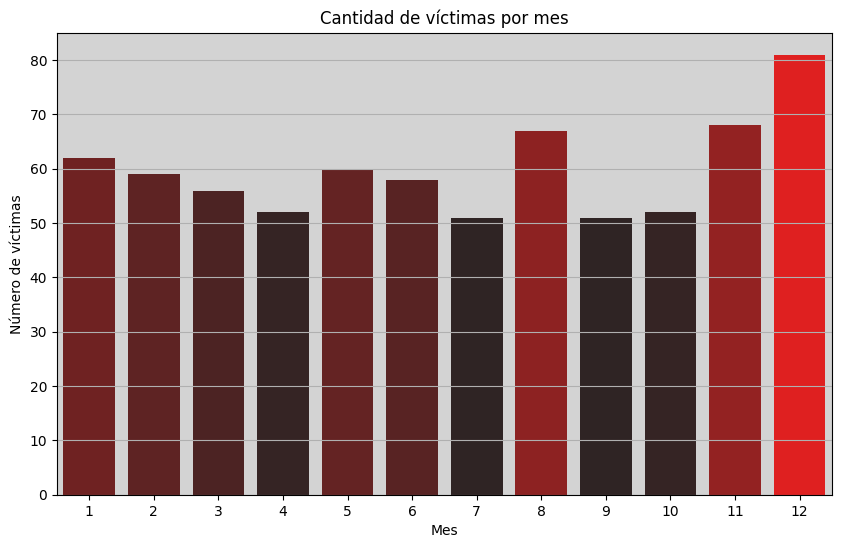

In [168]:
# Agrupo la cantidad de víctimas por mes.
muertes_por_mes = df_homicidios_hechos.groupby("MM")["N_VICTIMAS"].sum().reset_index()

# Ordeno los meses.
muertes_por_mes = muertes_por_mes.sort_values("MM")

# Creo una gráfica de barras.
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=muertes_por_mes, x="MM", y="N_VICTIMAS", hue="N_VICTIMAS", palette="dark:red", dodge=False)

# Añado título y etiquetas.
ax.set_title("Cantidad de víctimas por mes")
ax.set_xlabel("Mes")
ax.set_ylabel("Número de víctimas")

# Quito la leyenda.
ax.get_legend().remove()

# Añado grillas en el eje y.
ax.grid(axis="y")

# Agrego un color de fondo
ax.set_facecolor("#D3D3D3")

# Grafica.
plt.show()


Este gráfico índica que la mayoría de accidentes ocurre en las fechas de agosto, noviembre y diciembre.<br>
No puedo sacar conclusiones exactas sobre el porqué sucede esto, pero, si puedo dar suposiciones de a que se puede deber, pero antes de ello, lo mejor será revisar si esto se repite a través de los años.

Ahora realizaré un gráfico que índiqué la cantidad de muertes por mes y por año.

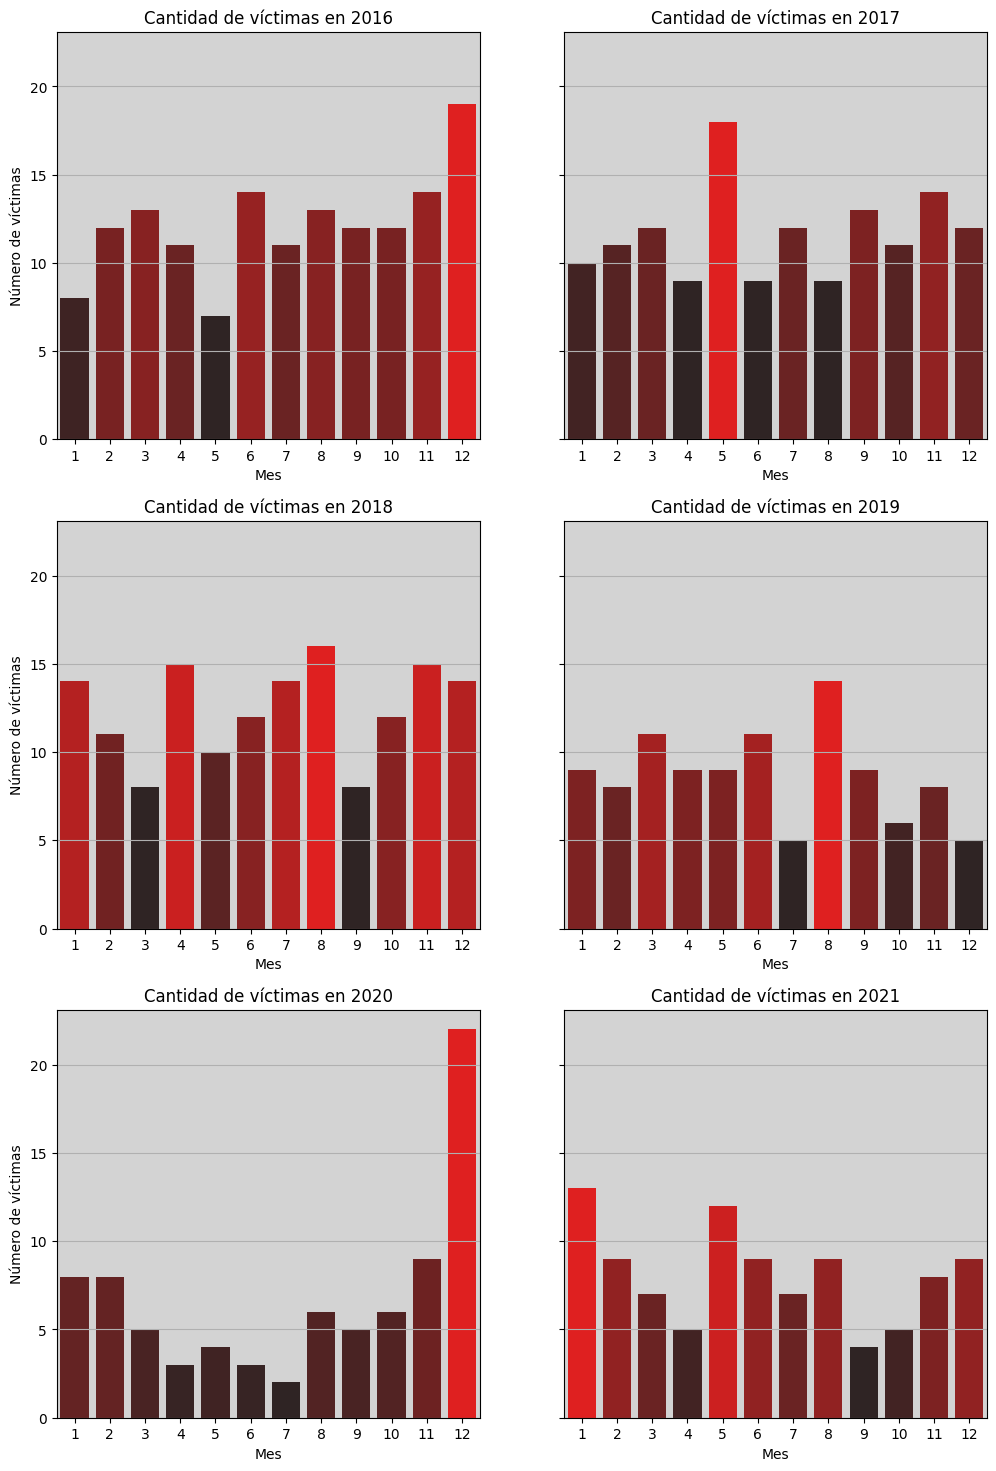

In [169]:
# Agrupo la cantidad de víctimas por mes y año.
muertes_por_mes_año = df_homicidios_hechos.groupby(["AAAA", "MM"])["N_VICTIMAS"].sum().reset_index()

muertes_por_mes_año = muertes_por_mes_año.sort_values(by=["AAAA", "MM"])

# Obtengo los años únicos.
años_unicos = muertes_por_mes_año["AAAA"].unique()

# Defino la cantidad de filas y columnas.
ncols = 2
nrows = (len(años_unicos) + 1) // ncols  # Calcula el número de filas necesarias.

# Defino el tamaño del gráfico y la cantidad de subplots.
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows), sharex=False, sharey=True)

# Aplano el array de ejes para facilitar la iteración.
ax = ax.flatten()

# Itero sobre cada año y su índice.
for i, año in enumerate(años_unicos):
    
    # Filtro los datos para el año actual.
    data_año = muertes_por_mes_año[muertes_por_mes_año["AAAA"] == año]
    
    # Creo el gráfico de barras para el año.
    sns.barplot (
        data=data_año,
        x="MM", 
        y="N_VICTIMAS",
        ax=ax[i],
        palette="dark:red",
        hue="N_VICTIMAS",
        dodge=False
    )
    
    # Añado el título y las etiquetas.
    ax[i].set_title(f"Cantidad de víctimas en {año}")
    ax[i].set_xlabel("Mes")
    ax[i].set_ylabel("Número de víctimas")
    
    # Quito la leyenda.
    ax[i].get_legend().remove()
    
    # Añado grillas en el eje y.
    ax[i].grid(axis="y")
    
    # Agrego un color de fondo
    ax[i].set_facecolor("#D3D3D3")

plt.show()


Con estos gráficos, podemos observar que en agosto, noviembre y diciembre, no siémpre se repite año a año, la cantidad de accidentes. Esto al menos, con estos datos de los cuales dispongo. <br>Podemos pensar así, que un mes no tiene porque estar relacionados con la cantidad de accidentes y que para aceverar este tipo de cuestiones, es necesario disponer de más datos.

<h3>Ahora, pasaré a realizar un estudio sobre si los accidentes ocurren mayormente en cruces o si no. </h3>

In [170]:
# Inicializo un array de numpy que almacenará la cantidad de accidentes con cruces y sin cruces.
# El prime valor representa si hay cruce y el segundo que no hay cruce.
cruce = np.array([0, 0])

# Itero sobre el df para obtener los valores de "Cruce". 
for i in df_homicidios_hechos["Cruce"]:
    # Compruebo que el valor no sea un "NO CRUCE".
    if i != "NO CRUCE":
        # Si no es un "NO CRUCE" se sumará uno al cantidad de accidentes con cruces.
        cruce[0] += 1
        continue
    # Si es un "NO CRUCE" se sumará uno al cantidad de accidentes sin cruces.
    cruce[1] += 1
    
cruce
        

array([525, 171])

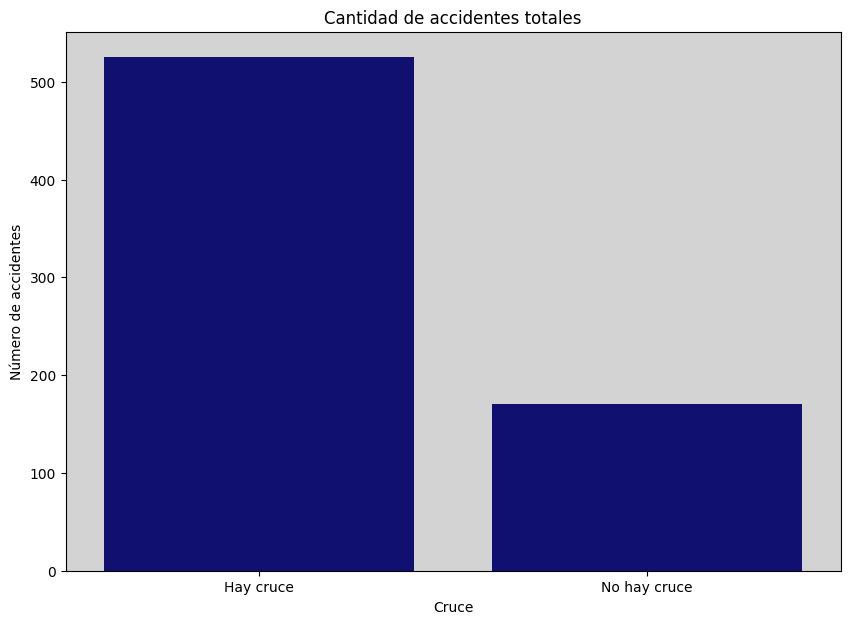

In [171]:
# Creo una gráfica de barras.
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=["Hay cruce", "No hay cruce"], y=cruce, color="navy")

# Añado el título y las etiquetas.
ax.set_title("Cantidad de accidentes totales")
ax.set_xlabel("Cruce")
ax.set_ylabel("Número de accidentes")

# Cambio el color del fondo
ax.set_facecolor("#D3D3D3")

# Grafica.
plt.show()

Al igual que anteriormente pasó con los meses y años, no voy a sacar una conclusión hasta no verificar que año a año se repite la cantidad de accidentes en cruces.<br>
Para realizar esto, voy a crear una nueva columna en el que dirá si fue o no una intersección con valores booleanos, esto con el fin de realizar agrupaciones de forma más sencilla y legible.

In [172]:
# Añado una columna booleana para indicar si el accidente fue o no en una intersección.
df_homicidios_hechos["ES_INTERSECCION"] = df_homicidios_hechos["Cruce"].apply(lambda x: x != "NO CRUCE")

# Agrupo la cantidad de accidentes por año y si fue en una intersección.
accidentes_por_año_interseccion = (
    df_homicidios_hechos.groupby(["AAAA", "ES_INTERSECCION"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={True: "EN_INTERSECCION", False: "NO_EN_INTERSECCION"})
    .reset_index()
)

# Visualizo el resultado.
accidentes_por_año_interseccion

ES_INTERSECCION,AAAA,NO_EN_INTERSECCION,EN_INTERSECCION
0,2016,30,114
1,2017,32,99
2,2018,30,113
3,2019,30,73
4,2020,18,60
5,2021,31,66


Leyendo la tabla, podemos observar que las accidentes se dan más, normalmente en intersecciones. Para hacerlo más comprensible voy a graficarlos.

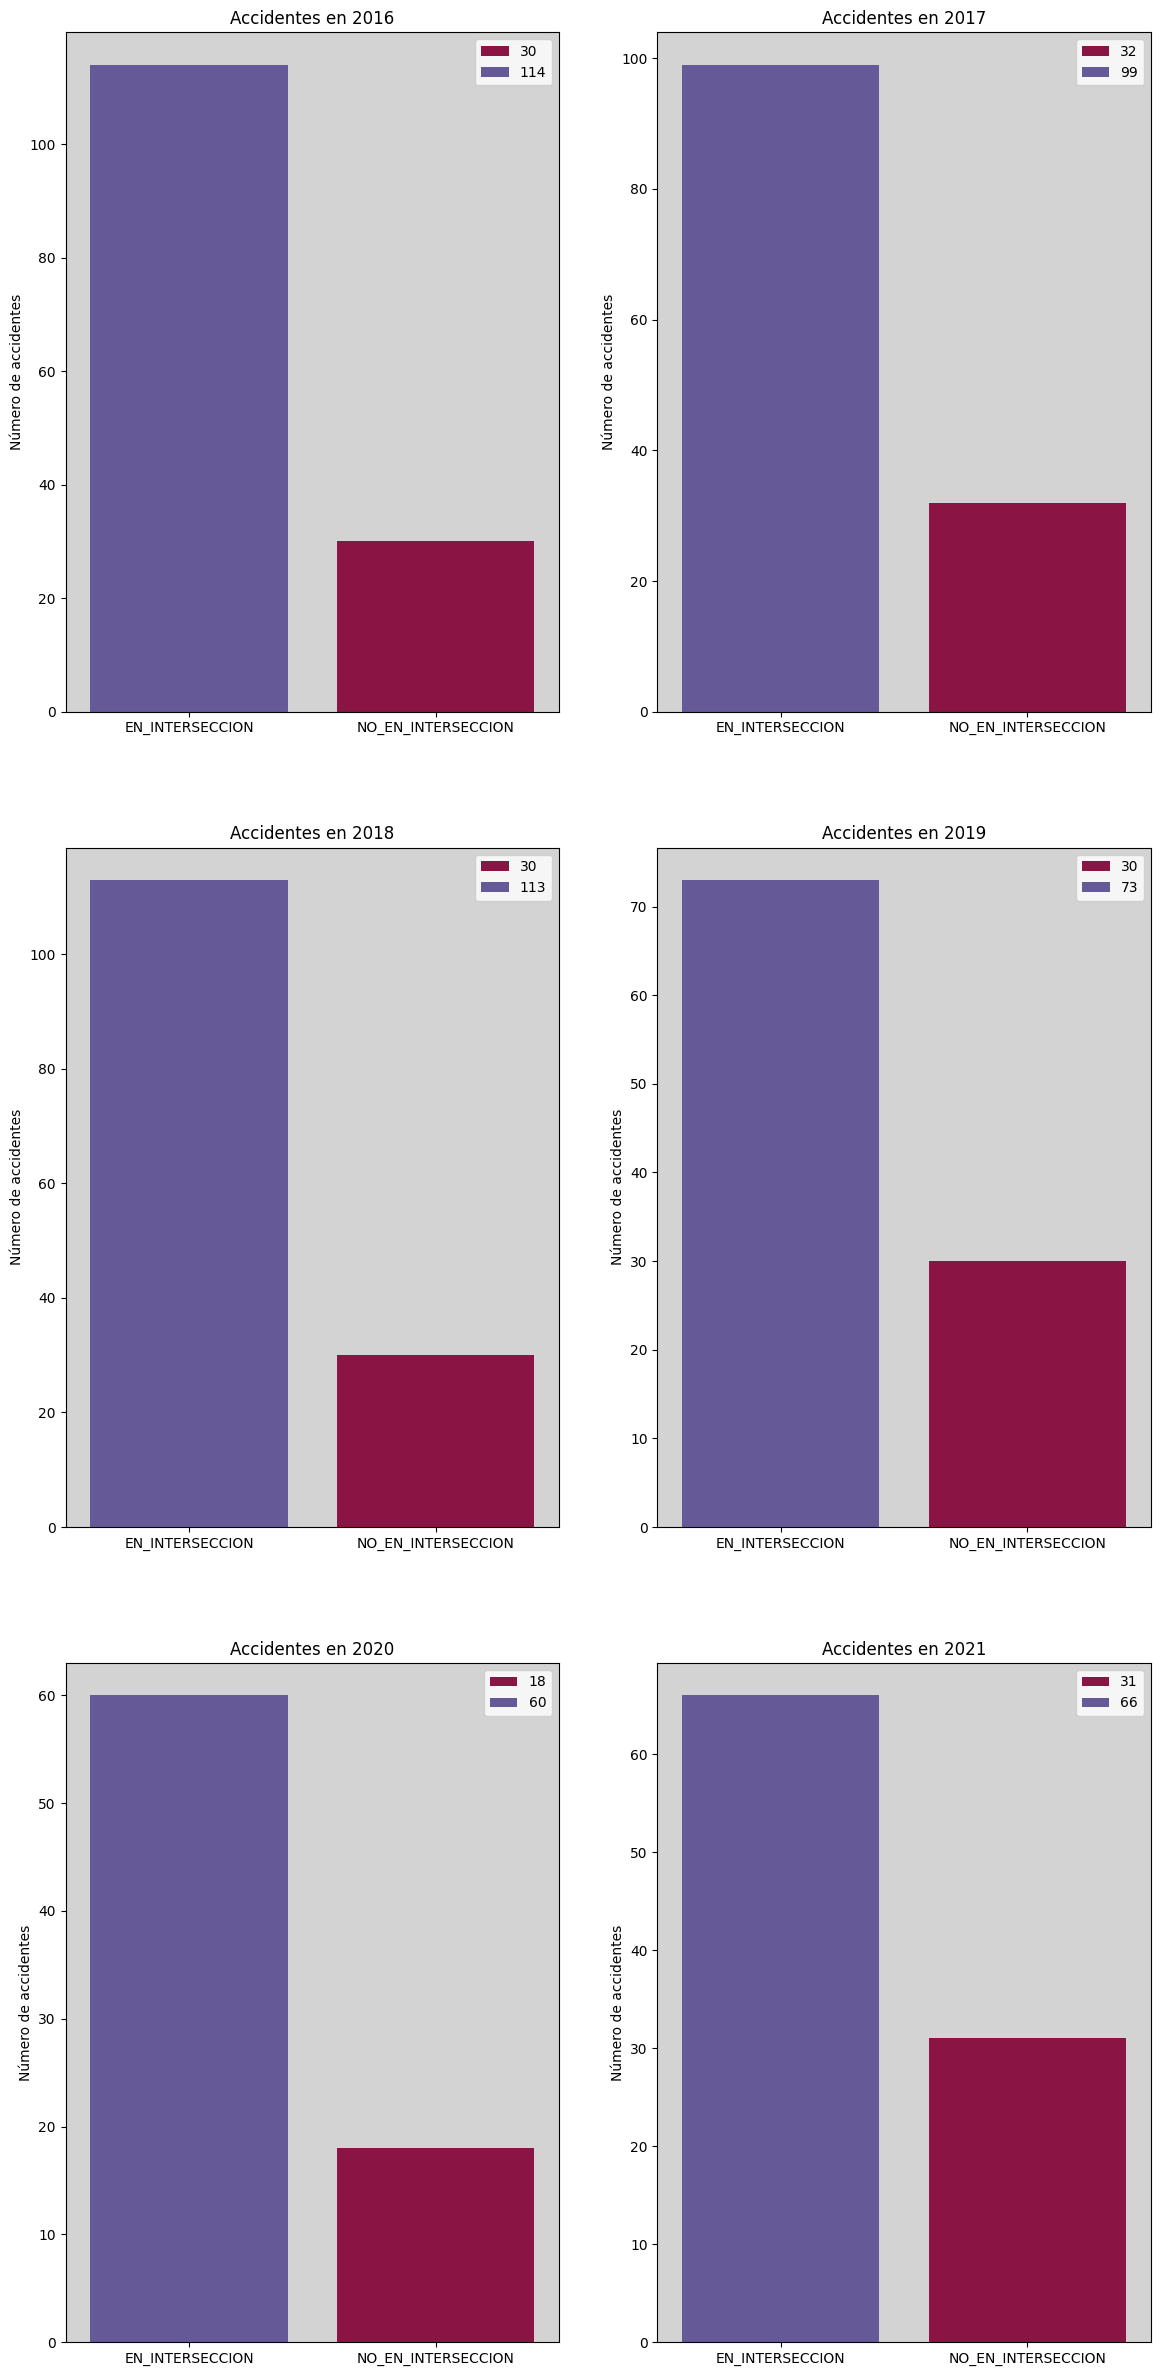

In [173]:
# Obtengo los años únicos.
años_unicos = accidentes_por_año_interseccion["AAAA"].unique()

# Defino el tamaño del gráfico y la cantidad de subplots.
fig, ax = plt.subplots(nrows=(len(años_unicos)+1)//2, ncols=2, figsize=(14,5 * len(años_unicos)))

# Itero sobre cada año y su índice.
for i, año in enumerate(años_unicos):
    # Filtro los datos para el año actual.
    data_año = accidentes_por_año_interseccion[accidentes_por_año_interseccion["AAAA"] == año]
    
    # Obtengo la posición del subplot en la cuadrícula.
    row = i // 2
    col = i % 2
    
    # Gráfico de accidentes en intersecciones.
    sns.barplot(
        x=["EN_INTERSECCION", "NO_EN_INTERSECCION"],
        y=data_año[["EN_INTERSECCION", "NO_EN_INTERSECCION"]].values[0],
        ax=ax[row, col],
        hue=data_año[["EN_INTERSECCION", "NO_EN_INTERSECCION"]].values[0],
        palette="Spectral"
    )
    
    # Titulo y etiquetas para cada gráfico.
    ax[row, col].set_title(f"Accidentes en {año}")
    ax[row, col].set_ylabel("Número de accidentes")
    ax[row, col].set_xlabel("")
    
    # Agrego un color de fondo.
    ax[row, col].set_facecolor("#D3D3D3")

plt.show()

Estos gráficos, más el gráfico anterior, nos demuestran que los accidentes ocurren más frecuentemente en las intersecciones. Esto nos da que pensar y podriamos tomar medidas al respecto. Por ejemplo, puede que falten semáforos, o es que acaso las personas no prestan atención al cruzar. Aún no sabemos demasiado, pero, tenemos una pista y ya sabemos donde enfocar una parte de la atención. <br>
Para poder sacar aun más concluciones, sería lógico crear un gráfico donde veamos como se tienen las relaciones entre las víctimas y los acusados y también un gráfico donde se observe donde son más frecuente los accidentes.

<h3>Me dispongo a observar en que tipo de calle ocurren la mayoría de accidentes.</h3>

In [174]:
# Agrupo la cantidad de accidentes que ocurre en cada tipo de calle.
tipos_de_calle = (
    df_homicidios_hechos.groupby("TIPO_DE_CALLE")["TIPO_DE_CALLE"]
    .size()
)

# Observo los resultados.
tipos_de_calle

TIPO_DE_CALLE
AUTOPISTA     66
AVENIDA      429
CALLE        136
GRAL PAZ      65
Name: TIPO_DE_CALLE, dtype: int64

Podemos observar que hay una gran diferencia respecto a la cantidad de accidentes ocurridos en las avenidas, esto supera por mucho a las demás. Para verlo mejor, voy a proceder a graficar.

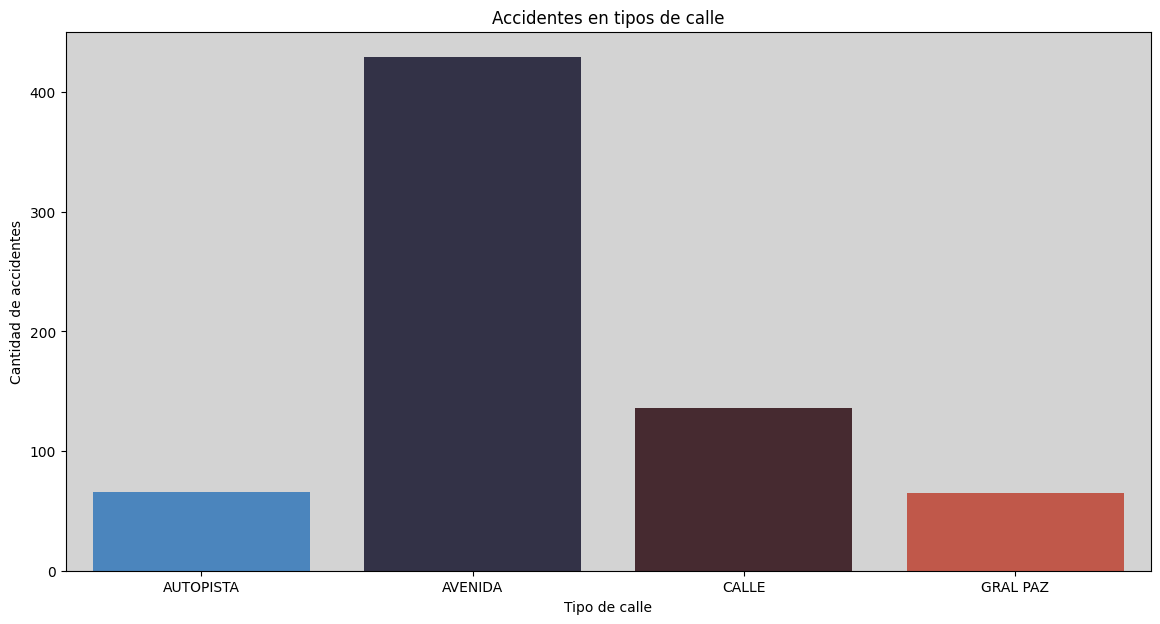

In [175]:
# Creo el gráfico.
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(
    x=tipos_de_calle.index,
    y=tipos_de_calle.values,
    hue=tipos_de_calle.index,
    palette="icefire"
)

# Agrego título y etiquetas.
ax.set_title("Accidentes en tipos de calle")
ax.set_xlabel("Tipo de calle")
ax.set_ylabel("Cantidad de accidentes")

# Cambio el color del fondo
ax.set_facecolor("#D3D3D3")

# Gráfica.
plt.show()

Aquí, se puede observar claramente la diferencia que hay entre las avenidas y los demás tipos de calle.<br>
Ahora, sabemos que aparte de enfocar los gastos en mejorar los cruces (intersecciones), se deben mejorar aún más, los cruces en las avenidas. <br>
Hay varios métodos que pueden ser empleados para cumplir el objetivo. Ejemplo, colocar semáforos donde no los haya, en caso de que hayan árboles obstaculizando los semáforos, cortalos; colocar letreros que índiquen que se debe reducir la velocidad. 

<h3>Por último, voy a revisar la relación que existen entre los participantes de los accidentes, para así, determinar que tipo de medidas podrían ser beneficiosas para la reducción de accidentes. 

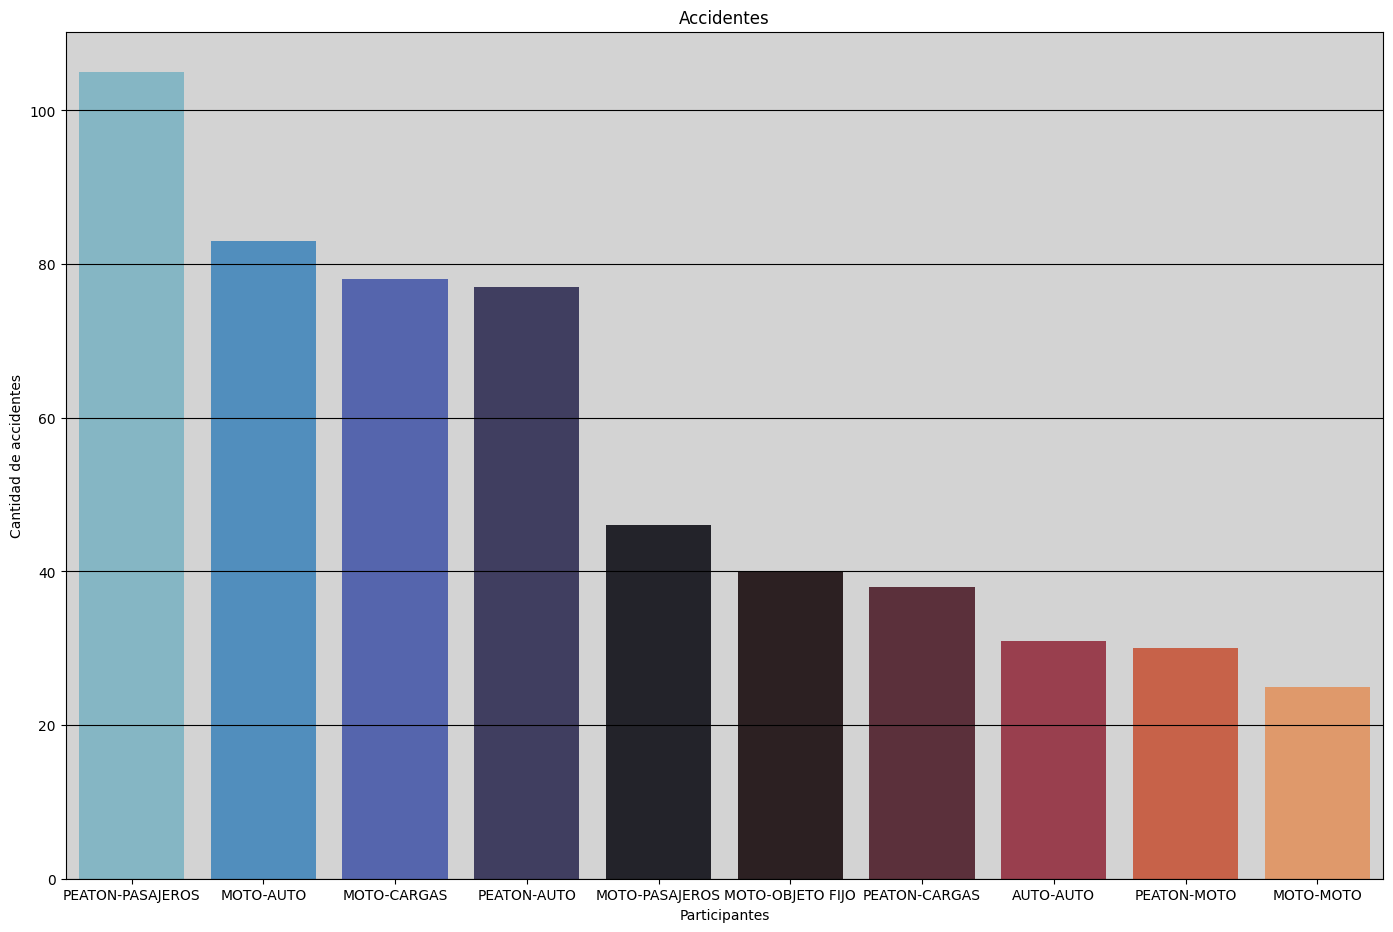

In [176]:
# Cuento la cantidad de veces que ocurre los acontecimientos de los participantes.
frecuencia_participantes = df_homicidios_hechos["PARTICIPANTES"].value_counts()

# Creo el gráfico de barras.
fig, ax = plt.subplots(figsize=(17,11))
sns.barplot(
    x=frecuencia_participantes[:10].index,
    y=frecuencia_participantes[:10].values,
    hue=frecuencia_participantes[:10].index,
    palette="icefire"
)

# Agrego un título y etiquetas.
ax.set_title("Accidentes")
ax.set_xlabel("Participantes")
ax.set_ylabel("Cantidad de accidentes")

# Agrego grillas en el eje y.
ax.grid(axis="y", color="black")

# Agrego un color de fondo.
ax.set_facecolor("#D3D3D3")

# Muestra el gráfico.
plt.show()

Se observa que los 4 casos de accidentes que más ocurren en fatalidad son: "PEATON-PASAJEROS", "MOTO-AUTO", "MOTO-CARGAS" y "PEATON-AUTO". En estos 4 casos, "Peaton", "auto" y "moto" aparecen 2 veces, esto quiere decir que, para empezar, el peatón que es quién se encuentra en el top 1 de accidentes que terminan en fatalidad, es la mayor victima del tránsito, una persona que ni siquiera va al volante de un vehículo es el más perjudicado. Habría que realizar reformas para proteger a estos ciudadanos que podemos ser cualquiera de nosotros. Por ejemplo, mejorar el contról policial para los vehículos, construir cordones más estrechos, aumentar la duración de los semáforos para peatones. Para la seguridad de los motociclistas podrían aplicarse reformas como asegurarse que todos ellos utilicen cascos y lo necesario para su seguridad y prohibir aquellos que van sin ello. Para las personas que viajan en autos se podrían hacer controles más estrictos para conseguir su licencia de conducir.<br>
Este gráfico nos demuestra un problema de nuestra sociedad, pero aún podemos aíslarlo más, así obtendríamos quien es que más causa accidentes (los culpables) y quien son los que más terminan accidentados (las víctimas).

<h3>Procederé a realizar un gráfico que muestra quienes son los que más veces totales ocacionan accidentes y cuales son los mayores casos de víctimas. </h3>

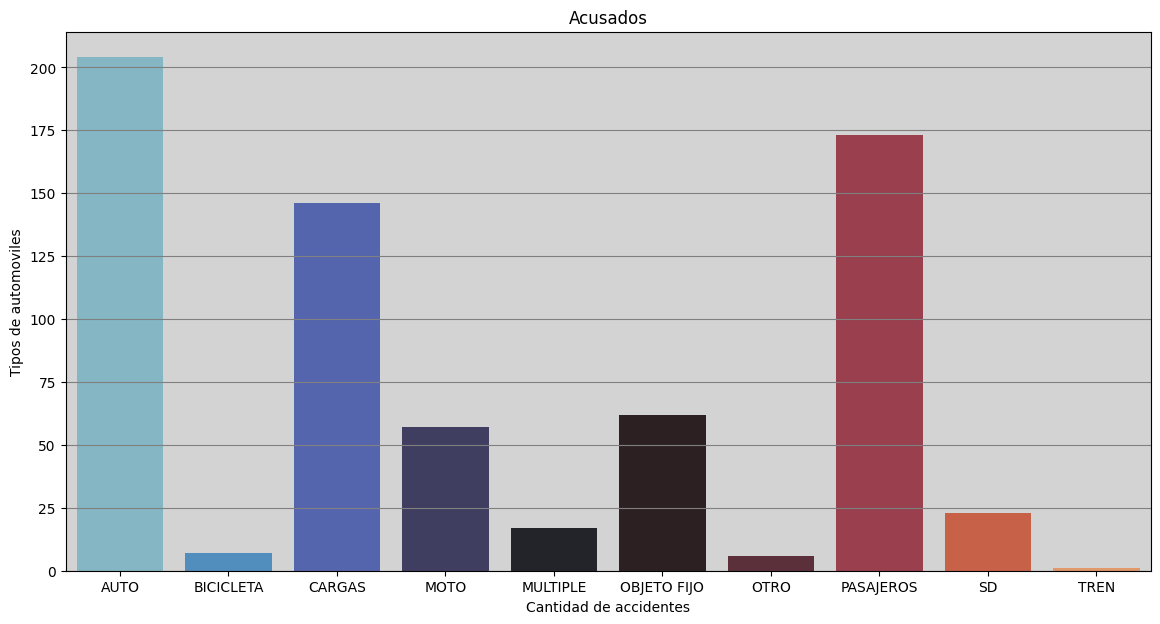

In [177]:
# Agrupo a los acusados y cuento sus apariciones.
acusados = df_homicidios_hechos.groupby("ACUSADO").size()

# Creo el gráfico de barras.
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(
    x=acusados.index,
    y=acusados.values,
    hue=acusados.index,
    palette="icefire"
)

# Agrego un título y etiquetas.
ax.set_title("Acusados")
ax.set_xlabel("Cantidad de accidentes")
ax.set_ylabel("Tipos de automoviles")

# Agrego un color de fondo.
ax.set_facecolor("#D3D3D3")

# Agrego un grilla en el eje y.
ax.grid(axis="y", color="grey")

plt.show()

Se observa que la mayoría de los culpables en accidentes son los autos, pasajeros y cargas. Podemos inferir que estos, al ser de mayor tamaño, es normal que no suelan ser las víctimas. Pero, ¿que medidas se habrían que tomar al respecto?, algo que puede funcionar son los controles policiales como venía diciendo, es necesario para poder ver si los conductores no van afectados por algún tipo de estupefaciente o, si los camioneros no llevan demasiadas horas sin dormir debido a su jornada laboral.

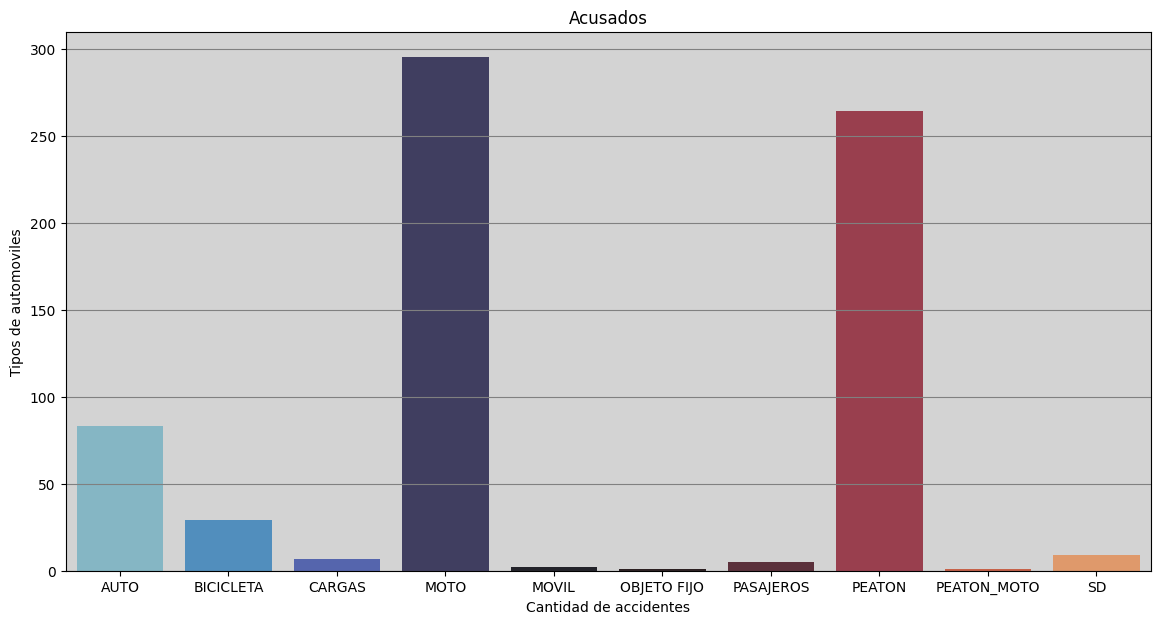

In [178]:
# Agrupo a las víctimas y cuento sus apariciones.
victimas = df_homicidios_hechos.groupby("VICTIMA").size()

# Creo el gráfico de barras.
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(
    x=victimas.index,
    y=victimas.values,
    hue=victimas.index,
    palette="icefire"
)

# Agrego un título y etiquetas.
ax.set_title("Acusados")
ax.set_xlabel("Cantidad de accidentes")
ax.set_ylabel("Tipos de automoviles")

# Agrego un color de fondo.
ax.set_facecolor("#D3D3D3")

# Agrego un grilla en el eje y.
ax.grid(axis="y", color="grey")

plt.show()

Por otra parte, aquí se observa que los que menos protección tienen, son los que peor terminan, los motociclistas y los peatones. Las medidas que se pueden tomas ya las he dicho y creo que siguen siendo las mismas, agregas semáforos, semáforos que duren más para peatones, hacer más grandes los cordones. Pero, para los motociclistas quizá también se podrían realizar controles más estrictos para la hora de obtener una licencia, y todo lo relacionado a su protección, como casco, guantes, etc.

Por último, exporto el DataFrame resultante.

In [179]:
df_homicidios_hechos.to_csv("homicidios_hechos_limpio.csv")

<h3>Con esto concluye mi EDA respecto a los homicidios. Hemos observado que los accidentes se dan más en las intersecciones, en avenidas, que la mayoría de los culpables son vehículos más grandes como autos, camiones y colectivos y, que los que más sufren de estos accidentes tragicos son las personas con menos protección como los transeuntes que podemos ser cualquiera de nosotros y los motociclistas. También hemos abordado posibles medidas como asfaltar las calles, colocar semáforos, aumentar controles policiales, etc. Espero que este estudio ayude a comprender la problemática de los accidentes y brinde una ayuda para mejorar las medidas. Gracias.</h3>

### Análisis exploratorio de datos referente a "homicidios_VICTIMAS.csv" 

Cargo el archivo "homicidios_HECHOS.xlsx" 

In [180]:
df_homicidios_victimas = pd.read_csv("homicidios_VICTIMAS.csv")

Observo los datos.

In [181]:
df_homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,12/12/2021,2021,12,12,PEATON,PEATON,FEMENINO,50,12/12/2021
713,2021-0093,12/13/2021,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021
714,2021-0094,12/20/2021,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021
715,2021-0095,12/30/2021,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,1/2/2022


<h3>Como en el anterior caso, debo leer columna por columna para ir observando las más importantes que no deben faltar, estás son: </h3>

"ID_hecho": El identificador único no debe faltar, pues es el que nos asegura que en realidad a ocurrido un accidente.  <br>

"FECHA": Para poder realizar estudios estadísticos que estén relacionados con el tiempo de cuando ocurrieron los accidentes, es fundamental tener la fecha.  <br>

"ROL": Requerimos saber el rol que cumpía la víctima, ¿Son más los conductores o serán los acompañantes los que acaban en fatalidad?  <br>

"VICTIMA": Es también igual de requerido saber en que vehículo viajaba la víctima para saber que medidas tomar al respecto.  <br>

"SEXO" y "EDAD": Tenemos que saber el sexo y la edad de las personas accidentadas para saber donde focalizar la atención de los esfuerzos para evitar este tipo de desgracias. 

<h4>Ahora sabiendo las columnas que son más importantes, observaré sus tipos de datos y su cantidad de nulos.

In [182]:
# Recorro cada columna del DataFrame
for column in df_homicidios_victimas.columns:
    
    # Verifico que la columna sea de tipo objeto (strings)
    if df_homicidios_victimas[column].dtype == 'object':
        # Reemplazo los valores que son solo espacios o tabuladores con NaN
        df_homicidios_victimas[column] = df_homicidios_victimas[column].replace(r'^\s*$', np.nan, regex=True)

In [183]:
df_homicidios_victimas.isna().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

Al no existir ninguna columna con nulos hace mucho más sencillo el trabajo. <br>
Pasaré a ver sus tipos de datos.

In [184]:
for column in df_homicidios_victimas.columns:
    print(column,"-", df_homicidios_victimas.loc[0, column], "-", df_homicidios_victimas[column].dtype)

ID_hecho - 2016-0001 - object
FECHA - 1/1/2016 - object
AAAA - 2016 - int64
MM - 1 - int64
DD - 1 - int64
ROL - CONDUCTOR - object
VICTIMA - MOTO - object
SEXO - MASCULINO - object
EDAD - 19 - object
FECHA_FALLECIMIENTO - 1/1/2016 - object


La columna edad no tiene el tipo de dato que debería, así que pasaré a solucionarlo.  <br> También agregaré dos columna de fecha con el formato "AAAA-mm-dd", una columna será del incidente y otra del fallecimiento de la víctima.

In [185]:
df_homicidios_victimas["fecha_incidente_amd"] = pd.to_datetime(df_homicidios_victimas["FECHA"], format="%m/%d/%Y")
df_homicidios_victimas["fecha_fallecimiento_amd"] = pd.to_datetime(df_homicidios_victimas["FECHA_FALLECIMIENTO"], format="%m/%d/%Y", errors="coerce")

In [186]:
df_homicidios_victimas["EDAD"] = pd.to_numeric(
    df_homicidios_victimas["EDAD"], errors='coerce'
)

Ahora pasaré a revisar si existen nulos nuevamente. Esto es para asegurar la consistencia de los datos, ya que si revisamos el dataset de datos, veremos que hay "ND" en algunas fechas de fallecimiento, haciendo referencia a que no se tiene la información.

In [187]:
df_homicidios_victimas.isna().sum()

ID_hecho                    0
FECHA                       0
AAAA                        0
MM                          0
DD                          0
ROL                         0
VICTIMA                     0
SEXO                        0
EDAD                       53
FECHA_FALLECIMIENTO         0
fecha_incidente_amd         0
fecha_fallecimiento_amd    69
dtype: int64

Ahora se puede observar que hay 69 casos donde no se sabe cuando la persona ha fallecido. Este no es un dato que estudiaremos, por lo que lo podemos dejar pasar, pero siémpre es mejor tener constancia de lo ocurrido.

<h3>Antes de pasar a realizar los gráficos, verifico que no existan filas duplicadas.

In [188]:
df_homicidios_victimas.duplicated().sum()

np.int64(0)

No hay filas completamente iguales.

In [189]:
df_homicidios_victimas["ID_hecho"].duplicated().sum()

np.int64(21)

Hay 21 casos donde el ID es el mismo, revisando la información esto puede ser posible debido a que sea el mismo siniestro y haya más de un fallecido, por lo que no es un error y no se debe modificar nada.

<h3>Ahora paso a realizar los gráficos que puedan ayudar a entender las distribuciones de los accidentes.

Realizo un gráfico observando las distribuciones de los accidentes a través del tiempo.

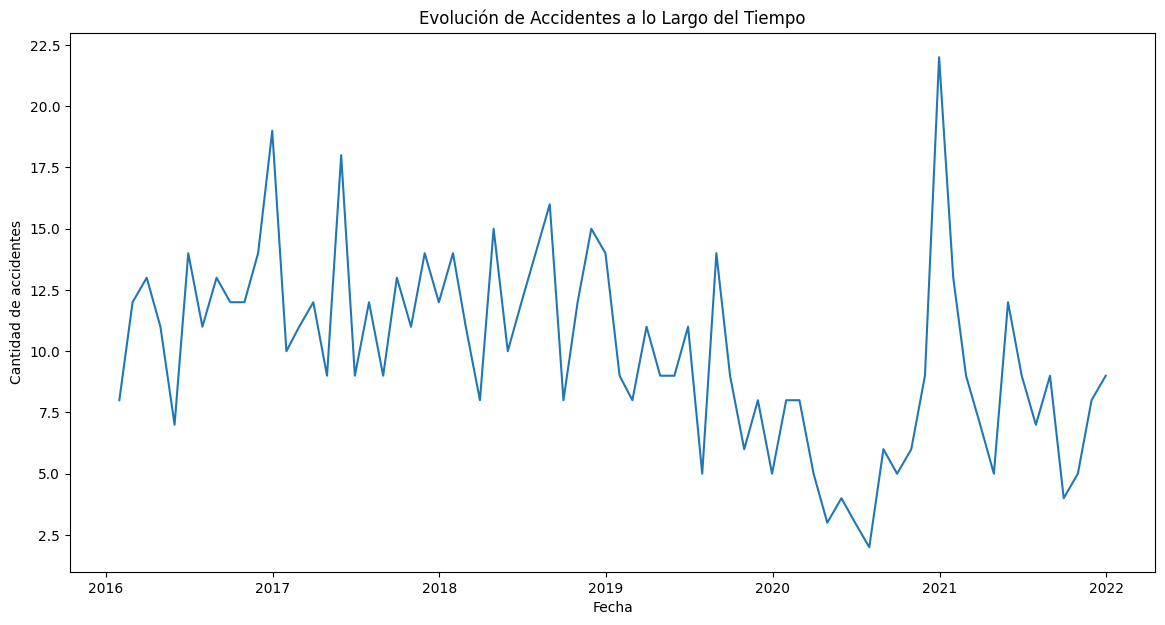

In [190]:
# Agrupo los accidentes por mes.
accidentes_por_mes = df_homicidios_victimas.resample('ME', on='fecha_incidente_amd').size().reset_index(name='accidentes')

# Realizo el gráfico.
fig, ax = plt.subplots(figsize=(14,7))
sns.lineplot(
    data=accidentes_por_mes,
    x="fecha_incidente_amd",
    y="accidentes"
)

# Agrego un título y etiquetas
ax.set_title("Evolución de Accidentes a lo Largo del Tiempo")
ax.set_xlabel("Fecha")
ax.set_ylabel("Cantidad de accidentes")

# Gráfica.
plt.show()

Es interesante poder observar en este gráfico como tuvo una bajada de accidentes durante el año 2020 y 2021, años de la pandemia. Esto tiene sentido, por el hecho de estar prohibido salir. Pero hay que prestar mucha atención para lograr ver claramente esto. Pasaré a realizar un gráfico igual pero que muestre los años.

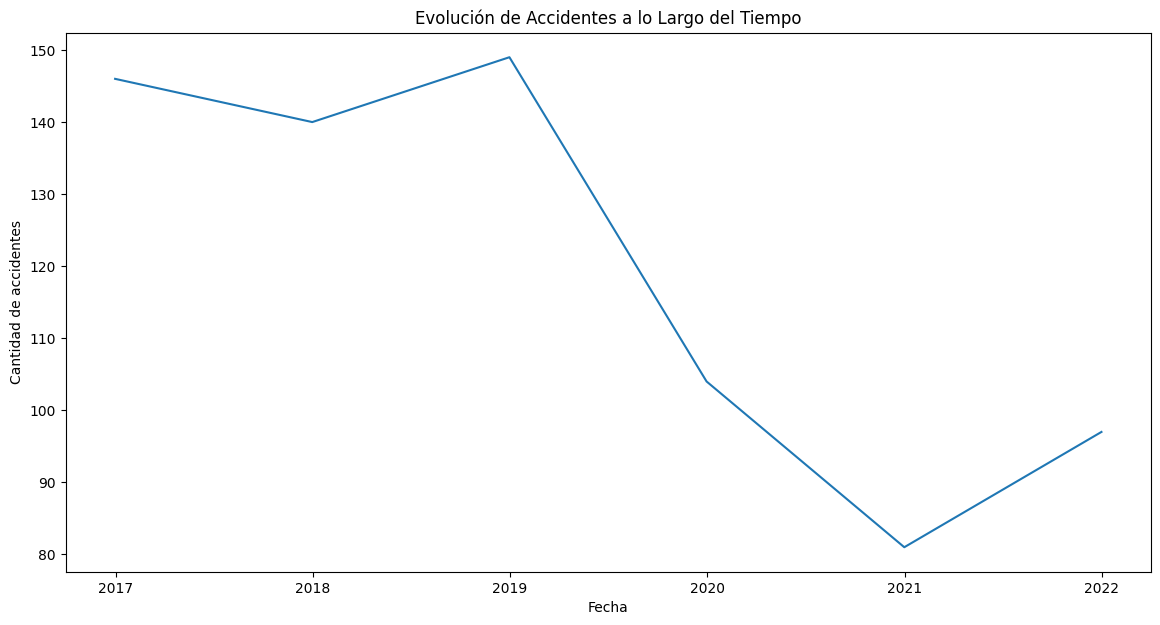

In [191]:
# Agrupo los accidentes por año.
accidentes_por_año = df_homicidios_victimas.resample('YE', on='fecha_incidente_amd').size().reset_index(name='accidentes')

# Realizo el gráfico.
fig, ax = plt.subplots(figsize=(14,7))
sns.lineplot(
    data=accidentes_por_año,
    x="fecha_incidente_amd",
    y="accidentes"
)

# Agrego un título y etiquetas
ax.set_title("Evolución de Accidentes a lo Largo del Tiempo")
ax.set_xlabel("Fecha")
ax.set_ylabel("Cantidad de accidentes")

# Gráfica.
plt.show()

Aquí se observa más claramente a lo que me refiero, la reducción de accidentes fatales a caído mucho a través de los años, y eso es bueno. Pero, no podemos asegurar de que esto no sea algo transitorio debido a la pandemia que azotó al mundo, debemos tomar medidas al respecto para reducir esas lineas a 0.

En el anterior EDA ya pudimos ver las ditribuciones de los accidentes a través del tiempo, pero no hemos visto ni el sexo, ni la edad y ni siquiera el rol que cumplía esa persona.<br>
Ahora graficaré precisamente estas 3 cosas.

In [192]:
# Agrupo a las víctimas por el vehículo en el que iban y el rol que cumplían en el accidente.
rol_vehiculo_victima = (
    df_homicidios_victimas.groupby(["VICTIMA", "ROL"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad", "VICTIMA": "Vehiculo", "ROL": "Rol"})
    )
rol_vehiculo_victima

,Vehiculo,Rol,Cantidad
0,AUTO,CONDUCTOR,65
1,AUTO,PASAJERO_ACOMPAÑANTE,29
2,BICICLETA,CICLISTA,29
3,CARGAS,CONDUCTOR,3
4,CARGAS,PASAJERO_ACOMPAÑANTE,4
5,MOTO,CONDUCTOR,261
6,MOTO,PASAJERO_ACOMPAÑANTE,39
7,MOTO,SD,3
8,MOVIL,CONDUCTOR,1
9,MOVIL,PASAJERO_ACOMPAÑANTE,2


Los casos en que el rol de alguien es acompañante y termina en fatalidad es bajo en comparación a cuando es conductor, pero para verlo más claramente haré un gráfico de distribución.

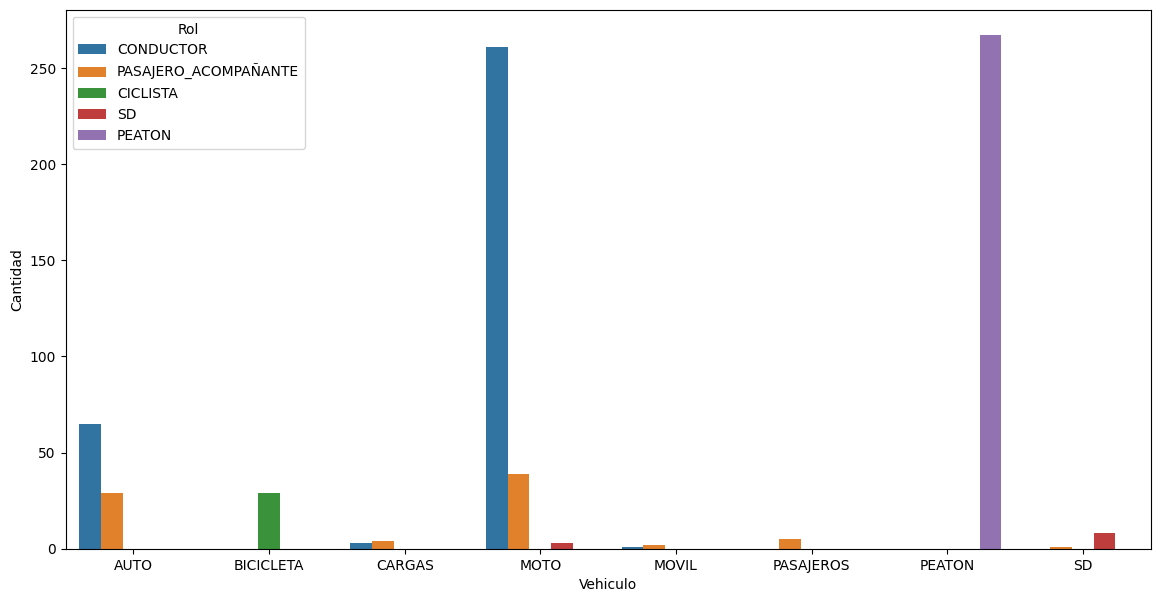

In [193]:
# Realizo el gráfico
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(
    data=rol_vehiculo_victima,
    x="Vehiculo",
    y="Cantidad",
    hue="Rol"
)

# Gráfica
plt.show()

Con esto queda más claro como los afectados son los peatones y los conductores. Los acompañantes en comparación parece que resultan en accidentes menos trágicos podríamos pensar a simple vista, pero, esto no tiene porque ser así, puede que el conductor no vaya con acompañante para empezar o que en todos los casos donde alguien vaya con acompañante, el acompañante termine peor. Quizá no podamos concretar el caso de los acompañantes, pero sí podemos tomar medidas para los conductores y peones, como colocar más semáforos y seda el paso. También para el caso de los ciclistas se podrían hacer carriles especiales solo para bicicletas.

In [194]:
genero_victima = (
    df_homicidios_victimas.groupby("SEXO")
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"})
)
genero_victima

,SEXO,Cantidad
0,FEMENINO,166
1,MASCULINO,545
2,SD,6


Creo que no hace falta hacer un gráfico para ver que género termina con más accidentes en fatalidad, pero, como en el caso anterior, no sabemos si es porque hay más hombres conduciendo habitualmente. Nos faltan datos para realizar una inferencia de ese tipo.

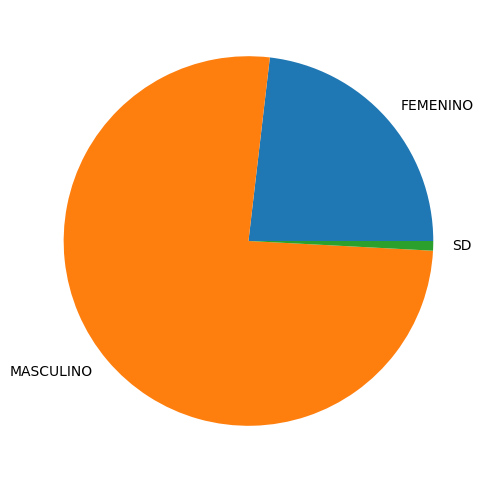

In [195]:
# Realizo el gráfico.
fig, ax = plt.subplots(figsize=(12,6))
ax.pie(
    x=genero_victima["Cantidad"],
    labels=genero_victima["SEXO"]
)

# Gráfica
plt.show()

Paso a ver las edades de las personas que sufrieron el accidente.

In [196]:
# Defino los rangos de edad.
rango_edad = [0, 17, 29, 39, 49, 59, 100]
nombres_rangos = ['0-17', '18-29', '30-39', '40-49', '50-59', '60+']

# Creo una nueva columna "Rango_Edad" que agrupe las edades.
df_homicidios_victimas["Rango_Edad"] = pd.cut(
    df_homicidios_victimas["EDAD"],
    bins=rango_edad,
    labels=nombres_rangos,
    right=True
)

# Agrupo por el nuevo rango de edades y cuento sus ocurrencias.
edades_rango_accidentes = (
    df_homicidios_victimas.groupby('Rango_Edad', observed=False)
    .size()
    .reset_index(name='Cantidad')
)

edades_rango_accidentes

,Rango_Edad,Cantidad
0,0-17,23
1,18-29,198
2,30-39,146
3,40-49,87
4,50-59,71
5,60+,139


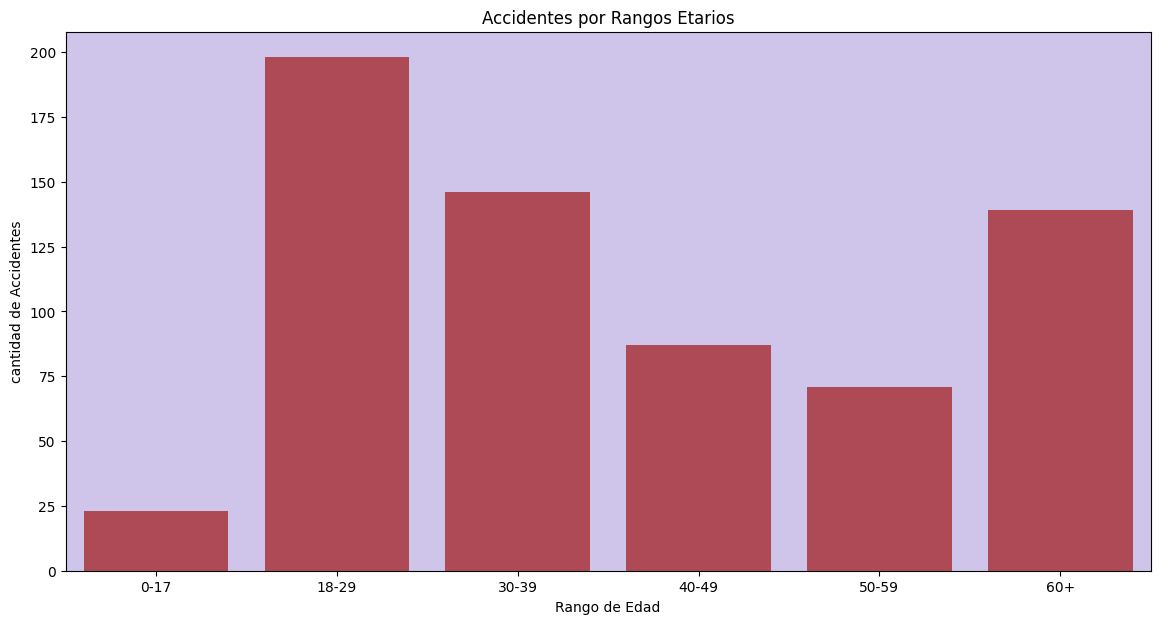

In [197]:
# Realizo el gráfico.
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(
    data=edades_rango_accidentes,
    x="Rango_Edad",
    y="Cantidad",
    color="#bf3949"
)

# Coloco un título y etiquetas.
ax.set_title("Accidentes por Rangos Etarios")
ax.set_xlabel("Rango de Edad")
ax.set_ylabel("cantidad de Accidentes")

# Coloco un color de fondo.
ax.set_facecolor("#cfc5ea")

# Gráfica.
plt.show()

La mayoría de los accidentes, según el gráfico, ocurre en la etapa de crecimiento de jovén a adulto, esto puede deberse a varios factores, uno de ellos podrían ser las hormonas, si bien no son tan impulsivas como las de un adolescente, aún persisten en gran medida y, esto les hace cometer riesgos que una persona normal no haría. Luego, los segundos con más accidentes fatales son las personas de 30 a 39 y mayores de 60, no puedo inferir mucho al respecto, pero, una de mis creencias supone en pensar que debido a que las personas  ya a partir de los treitas, son capaces de comprar sus propios vehículos y por ello son la mayoría de la población, pero, esto solo es una suposición, nada más. Y, respecto a las personas mayores, creo que puede deberse a la facultades reducidas, por ejemplo, en su salud.

Por último, exporto el DataFrame resultado.

In [198]:
df_homicidios_victimas.to_csv("homicidios_victimas_limpio.csv")

Las conclusiones que pueden ser sacadas de este, aunque corto estudio, son muchas. Por ejemplo, como las personas que son los propios conductores son los que en su mayoría terminan sin vida en un accidente, esta mayoría son hombres y su edad es un poco variada, pero con la probabilidad más alta de que tenga entre 18 y 29 años. También fue visto que una gran cantidad de accidentes que terminan en fatalidad, son de peatones. <br><br>
Me gustaría proponer algunas soluciones para reducir estos accidentes (de los cuales también fui víctima):
1. Hay en muchos barrios los cuales no hay ni siquiera semáforos. Propongo que se coloquen semáforos en dichos lugares.
2. Muchas veces, los lugares ni siquiera están iluminados y muchos automoviles van sin luces en plena noche. Propongo que se coloquen postes de luz para iluminar y evitar accidentes.
3. A raíz del punto anterior, también quiero porponer una mayor vigilancia hacia los conductores por las noches.
4. Realizar refacciones en las calles donde están rotas y, pavimentar aquellas que ni siquiera fueron pavimentadas en primer lugar.
5. Hay muchísimos lugares donde jamás se han dibujado un seda al paso. Esto, y sumando que no tengan semáforos, es una pista clara de que en algún momento va a ocurrir algún accidente.  <br><br>

Estas, son solo unas pocas sugerencias que doy, hay muchas más que se pueden dar, pero algunas son hasta mágicas si no se pueden tener estos mínimos.  <br><br>

Con esto me despido y espero este estudio haya servido para interesarles sobre los peligron en las calles.<br><br>

Trabajo realizado por: Cristo Benjamín Morales Saucedo.
